In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt

In [2]:
np.random.seed(40)

In [3]:
X, y = make_blobs( # X - DS, y - our right responce
    n_samples=200, # number of points
    n_features=2, # 2 признака
    centers=7, # заранее задаем 4 кластера
    cluster_std=0.7, # разброс, стандартное отклонение
    shuffle=True
)

In [4]:
X

array([[ -1.59517009,  -4.66309343],
       [ -0.68162311,  -3.30064536],
       [  5.5251265 ,   4.76851697],
       [ -1.10957399,  -8.21269891],
       [ -2.43857872,  -9.19607944],
       [  9.27257041,   2.15748044],
       [  1.19094836,   2.10264254],
       [  0.81774931,   1.67456054],
       [  4.67270386,  -4.65894368],
       [ -1.22169028,  -3.3587259 ],
       [ -2.35803654,  -4.36964571],
       [  5.43030956,   5.09372067],
       [ 10.1574689 ,   2.18968216],
       [  5.70835419,   3.20377377],
       [ -2.78218359,  -8.74625868],
       [ -1.82520614,  -9.66821982],
       [ -0.15541901,   2.72426023],
       [  5.85559076,   4.30081031],
       [ -1.46624226,  -8.95181499],
       [  0.25390033,   1.68793938],
       [  6.35614169,  -4.39265653],
       [  0.09744339,   2.3909194 ],
       [  5.23066792,  -4.50065274],
       [  6.1477629 ,   3.79728288],
       [ -1.79247736,  -9.19717974],
       [ 10.04855207,   2.65735189],
       [  6.2619242 ,  -3.83504395],
 

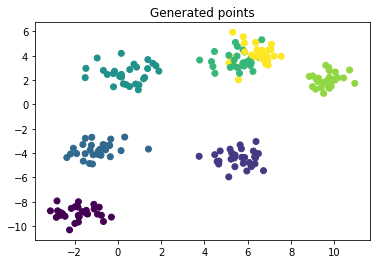

In [5]:
plt.title('Generated points')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [6]:
kmeans = KMeans(
    n_clusters=4, # На сколько кластеров поделить наш ДС
    init='random', # Начальная инициализация центров кластеров
    n_init=10, # Начальное колиечтво этих точек (центров класстеров)
    max_iter=300, # 
    tol=1e-04 # Величина изменения при сдвиге
)
kmeans_prediction = kmeans.fit_predict(X)
kmeans_prediction

array([0, 0, 2, 0, 0, 2, 1, 1, 3, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 1, 3, 1,
       3, 2, 0, 2, 3, 1, 1, 2, 2, 0, 0, 2, 3, 0, 2, 0, 2, 0, 0, 2, 0, 3,
       2, 2, 3, 0, 0, 3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 2,
       3, 3, 2, 0, 2, 1, 3, 1, 3, 3, 3, 2, 3, 2, 2, 0, 1, 2, 2, 3, 0, 0,
       1, 2, 0, 3, 0, 2, 1, 3, 0, 3, 0, 1, 1, 0, 3, 1, 2, 3, 2, 3, 2, 2,
       0, 2, 0, 3, 0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2,
       3, 0, 1, 3, 1, 2, 3, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1,
       1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 0,
       2, 1])

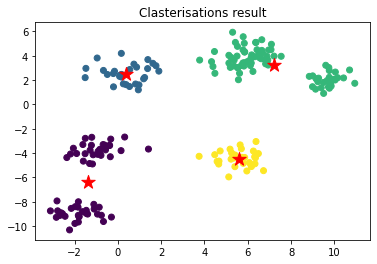

In [7]:
plt.title("Clasterisations result")
# Draw our points
plt.scatter(X[:, 0], X[:, 1], c=kmeans_prediction)
# Draw our clusters centers
plt.scatter(*kmeans.cluster_centers_.T, # Вызываем наши центыр и транспонируем нашу матрицу
            marker='*', 
            s=200, 
            color='r')
plt.show()

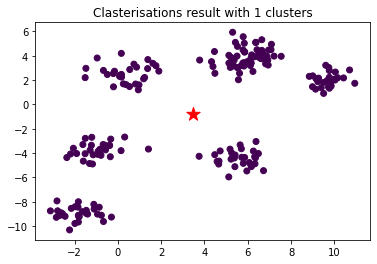

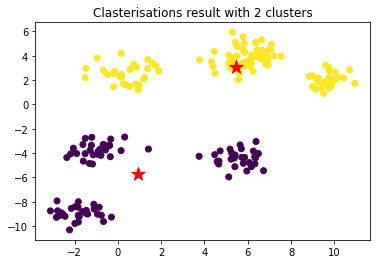

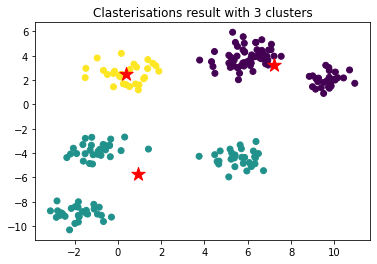

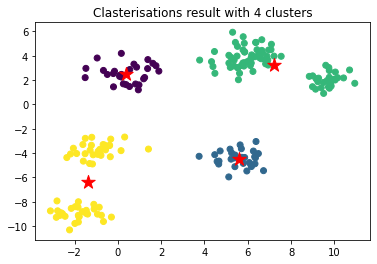

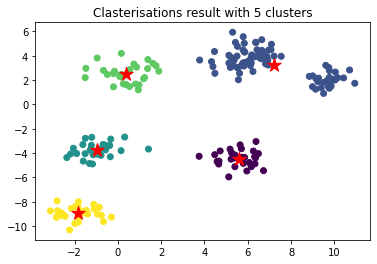

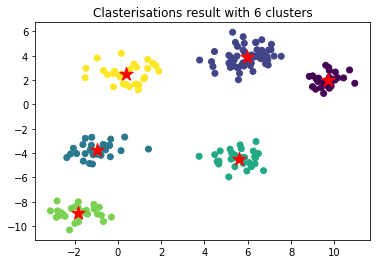

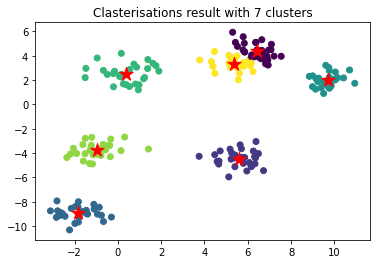

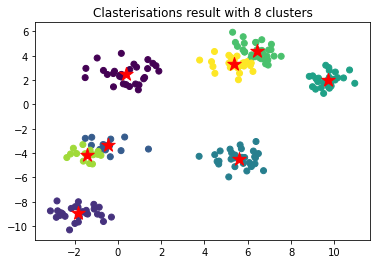

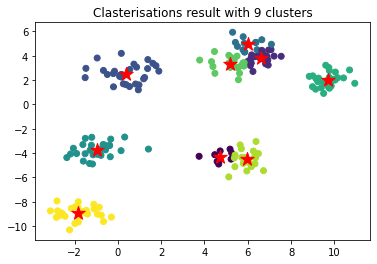

In [8]:
distortions = []
for i in range(1, 10):
    kmeans = KMeans(
        n_clusters=i, # На сколько кластеров поделить наш ДС
        init='random', # Начальная инициализация центров кластеров
        n_init=10, # Начальное колиечтво этих точек (центров класстеров)
        max_iter=300, # 
        tol=1e-04 # Величина изменения при сдвиге
    )
    kmeans_prediction = kmeans.fit_predict(X)
    plt.title(f"Clasterisations result with {i} clusters")
    # Draw our points
    plt.scatter(X[:, 0], X[:, 1], c=kmeans_prediction)
    # Draw our clusters centers
    plt.scatter(*kmeans.cluster_centers_.T, # Вызываем наши центыр и транспонируем нашу матрицу
                marker='*', 
                s=200, 
                color='r')
    plt.show()
    distortions.append(kmeans.inertia_)

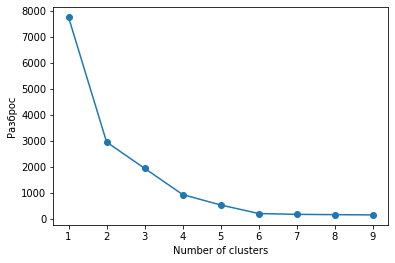

In [9]:
plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Разброс')
plt.show()